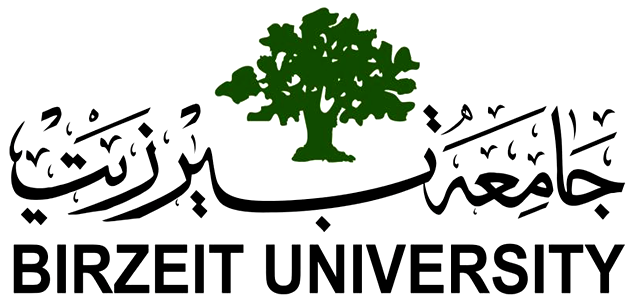

-------------------------------------------------------------------------
# **Electrical and Computer Engineering Department**
**`Machine Learning and Data Science ‐ ENCS5341`**
----------------------------------------------------

# **Prepared by:** Jehad Hamayel 1200348
**Section number:** 2

**Instructor:** Dr. Yazan Abu Farha

**Date & Place:** 28/11/2023, Masri202


-----------------------------------------------------------------------------------

# Welcome to my Assignment

---------------------------------------------------

### **In the beginning, here I imported some of the Python offices needed for the program**

In [9]:
import pandas as pand
import matplotlib.pyplot as plot
import numpy as np

# Reading the file
*   The first step is to read the file and store it in a format so that the operations can be performed on it:




In [10]:
#Read the data file
try:
    DataPath = ('/content/cars.csv')
    DataFrame = pand.read_csv(DataPath)
    print("Reading completed successfully")
except Exception as e:
    print("Error The reading was not successful", str(e))

Reading completed successfully


*   The second step is to calculate the number of features and examples

In [11]:
#Print The number of features and examples
print("The number of features are:", len(DataFrame.columns))
print("The number of examples are:", len(DataFrame))

The number of features are: 8
The number of examples are: 398


# **Check the Missing Values**

*   I checked whether there are features with missing values

In [12]:
#Check for missing values and print how many missing values are found
MissingValues = DataFrame.isnull().sum()

*   Here I print it if there are missing values and if there is any feature in them

In [13]:
if any(MissingValues > 0):
    print("Yes there are missing values in each feature:\n", MissingValues)
else:
    print("No there are not missing values in each feature")

Yes there are missing values in each feature:
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64


Here, according to the result, there are 6 missing values in Feature, which is called horsepower, and 3 missing values in Feature, which is called origin

# **Fill the missing values**

* Here I filled in the missing values using the median and mode, where I used each type as appropriate

In [14]:
#Filling in missing values using the median and mode
intFloatColumns = DataFrame.select_dtypes(include=['int', 'float']).columns
StringColumns = DataFrame.select_dtypes(include=['object']).columns
DataFrame[intFloatColumns] = DataFrame[intFloatColumns].fillna(DataFrame[intFloatColumns].median())
DataFrame[StringColumns] = DataFrame[StringColumns].fillna(DataFrame[StringColumns].mode().iloc[0])

# Country produces cars with better fuel economy:

* I drew the Box Plot as in the following output, where it appears that Asia is the country that produces the most cars with better fuel economy.

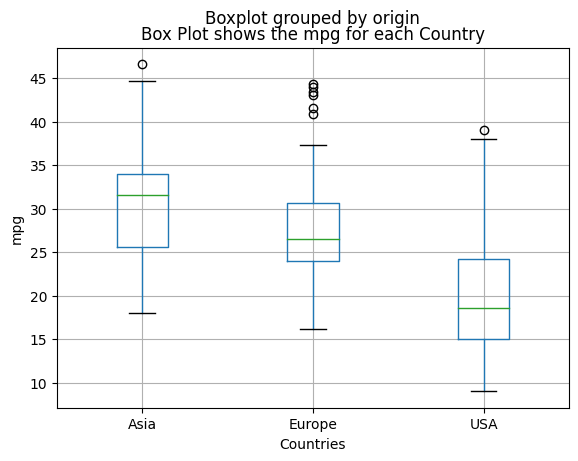

In [15]:
#plot the box plot that shows the mpg for each country so we know which country produces cars with better fuel economy
DataFrame.boxplot(column='mpg', by='origin')
plot.title("Box Plot shows the mpg for each Country")
plot.xlabel('Countries')
plot.ylabel('mpg')
plot.show()

As it extracts the median value for each country and shows which country is the best

In [16]:
#Know the median mpg for each country to know which country is better at consuming fuel for cars
medianForMPGofTheCountries = DataFrame.groupby('origin')['mpg'].median()
bestFuelCountry = medianForMPGofTheCountries.idxmax()
bestFuelCountryMedian = medianForMPGofTheCountries.max()
print(f"The Better Fuel Economy in the {bestFuelCountry} country with median {bestFuelCountryMedian}")

The Better Fuel Economy in the Asia country with median 31.55


# Most Similar To a Gaussian

* In the following code, I drew the histogram of each feature to show which feature has a distribution that is most similar to a Gaussian

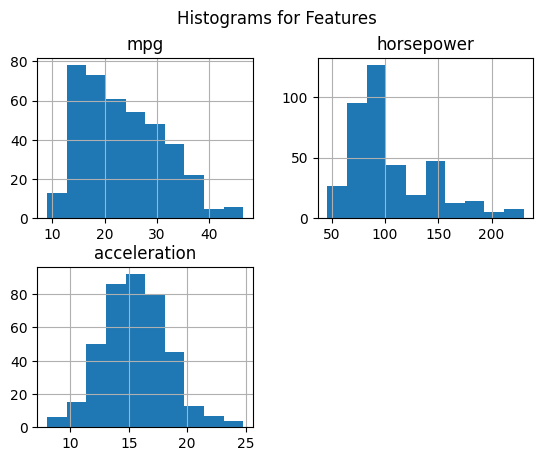

In [17]:
#plot the histogram of each feature so that it is known which features has a distribution that is most similar to a Gaussian
DataFrame[['mpg', 'horsepower', 'acceleration']].hist()
plot.suptitle('Histograms for Features')
plot.show()

As is evident in the result, the acceleration feature has a distribution that is most similar to a Gaussian

# Quantitatively Measuring

* I used skewness in order to find which features has a distribution that is most similar to a Gaussian by quantitatively measuring

In [18]:
#Find out which features has a distribution that is most similar to a Gaussian by quantitatively measuring skewness
features = ['acceleration', 'horsepower', 'mpg']
S= 100
bestFeat=""
for feature in features:
    skewness_S = 3*((np.mean(DataFrame[feature])-np.median(DataFrame[feature]))/np.std(DataFrame[feature]))
    print(f'The skewness Value for the feature({feature}) = {skewness_S}')
    if abs(skewness_S) < abs(S):
        S = skewness_S
        bestFeat = feature
print(f'The data for {bestFeat} looks Gaussian distributed because:\nit is approximately symmetric with skewness = {S} ')

The skewness Value for the feature(acceleration) = 0.07416661882340907
The skewness Value for the feature(horsepower) = 0.8490483313059655
The skewness Value for the feature(mpg) = 0.19775648700563309
The data for acceleration looks Gaussian distributed because:
it is approximately symmetric with skewness = 0.07416661882340907 


As is the result, it appears that the acceleration is the feature that, through the skewness, has a value very close to zero, meaning that it is close to the distribution being symmetrical.

# Scatter Plot Of Horsepower X MPG

* I drew a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis until learning is worked on

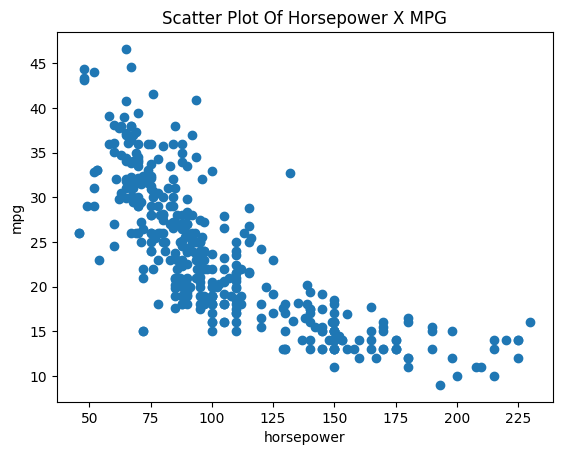

In [19]:
# Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis.
plot.scatter(DataFrame['horsepower'], DataFrame['mpg'])
plot.title('Scatter Plot Of Horsepower X MPG')
plot.xlabel('horsepower')
plot.ylabel('mpg')
plot.show()

The figure shows the relationship between horsepower and mpg

# Simple Linear Regression

* I built a code that solves the simple linear regression problem (one feature) using the closed form solution and use it to learn a
linear model to predict the ‘mpg’ from the ‘horsepower’

In the beginning, I created an X Matrix of units and the horsepower feature, and a Y Target of the mpg feature

In [20]:
X_Matrix = np.column_stack((np.ones(len(DataFrame)), DataFrame['horsepower']))
Y_Target = DataFrame['mpg'].values

Then I calculated the Parameters using the closed form solution w = (X.T@X)-1 @X.T@y

In [21]:
W_Parameters = np.linalg.inv(X_Matrix.T @ X_Matrix) @ X_Matrix.T @ Y_Target
print(f'W_Parameters by simple linear regression: {W_Parameters}')

W_Parameters by simple linear regression: [40.01131787 -0.1581602 ]


Then I drew the scatter and then drew the linear regression

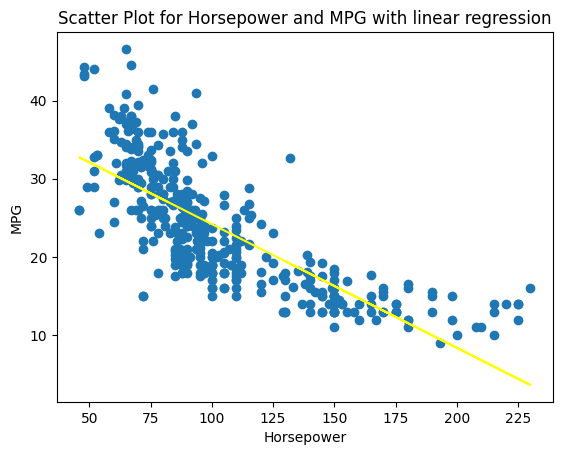

In [22]:
plot.scatter(DataFrame['horsepower'], DataFrame['mpg'])
plot.plot(DataFrame['horsepower'], X_Matrix @ W_Parameters, color='yellow')
plot.title('Scatter Plot for Horsepower and MPG with linear regression')
plot.xlabel('Horsepower')
plot.ylabel('MPG')
plot.show()

The linear regression line appears in the figure and the learning appears on the data

# Non Linear Regression (Quadratic)

*  quadratic function of the form: f = w0 + w1*x + w2*x^2


I used linear regression to obtain non linear regression, and this is a way to use it, where an operation is performed on the data. For example, here is the quadratic function, where non linear regression was obtained.

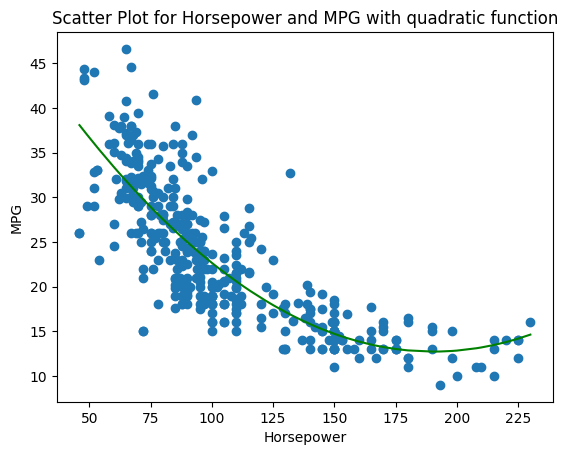

In [23]:
#Finding the Parameters of the object functionn, then find the Quadratic linear regression of horsepower
X_MatrixOfQuadratic = np.column_stack((np.ones(len(DataFrame)), DataFrame['horsepower'], DataFrame['horsepower'] ** 2))
W_ParametersOfQuadratic = np.linalg.inv(X_MatrixOfQuadratic.T @ X_MatrixOfQuadratic) @ X_MatrixOfQuadratic.T @ Y_Target
x = DataFrame['horsepower'].sort_values()
QuadraticFun = W_ParametersOfQuadratic[0] + W_ParametersOfQuadratic[1]*x + W_ParametersOfQuadratic[2] * x **2
plot.scatter(DataFrame['horsepower'], DataFrame['mpg'])
plot.plot(x,QuadraticFun, color='green')
plot.title('Scatter Plot for Horsepower and MPG with quadratic function')
plot.xlabel('Horsepower')
plot.ylabel('MPG')
plot.show()

It appears in the figure that the Non Linear Learning line was obtained and became more accurate

# Gradient Descent Function

* I built the Gradient Descent Function, as we derived the Gradient Descent Function relationship, which is: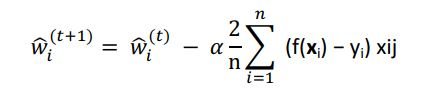

In [24]:
#Gradient Descent Function
def GradientDescent(X_Matrix, Y_Target, W_Parameters, learning_rate, iterations):
    n = float(len(X_Matrix))
    for i in range(iterations):
        gradientDescent = np.zeros(X_Matrix.shape[1])
        for x in range(len(X_Matrix)):
              gradientDescent += ((X_Matrix[x] @ W_Parameters) - Y_Target[x]) * X_Matrix[x] * (2 / n)
        W_Parameters -=  (learning_rate * gradientDescent)

    return W_Parameters

**Starting with a random initial parameters and set the learning rate and iterations until I get the desired one**

In [25]:
#Preparing data for the partitions using linear regression using Gradient Descent
X_Matrix_GradientDescent = np.column_stack((np.ones(len(DataFrame)), DataFrame['horsepower']))
Y_Target_GradientDescent = DataFrame['mpg'].values
W_ParametersInitial = np.random.rand(X_Matrix_GradientDescent.shape[1])
learningRate = 0.05
iterations = 1500

Before doing the work on the data, I needed to do a scaling process in order to get the correct process and not cause a problem with the storage

In [26]:
standard=np.std(X_Matrix_GradientDescent)
mean=np.mean(X_Matrix_GradientDescent)
#Doing the scaling process
X_Matrix_GradientDescent = (X_Matrix_GradientDescent - np.mean(X_Matrix_GradientDescent)) / np.std(X_Matrix_GradientDescent)

Then the function was called and the intended application was applied with the scaling data

In [27]:
W_Parameters_GradientDescent = GradientDescent(X_Matrix_GradientDescent, Y_Target_GradientDescent, W_ParametersInitial, learningRate, iterations)
print(W_Parameters_GradientDescent)

[-35.74965121  -9.21760497]


The previous values ([-35.74965121 -9.21760497]) are the values with the new data, where I retrieved the data by doing the reverse process of Scalling and extracting the parameters for comparison..

In [28]:
#Extraction parameters before scaling
W1=(W_Parameters_GradientDescent[1]/standard)
W0=(((W_Parameters_GradientDescent[0]/standard)-(W_Parameters_GradientDescent[0]*mean)/standard)-((W_Parameters_GradientDescent[1]*mean)/standard))
print(f'the Parameter:(W0={W0},W1={W1})')

the Parameter:(W0=40.01131787108623,W1=-0.1581602031338068)


The data was extracted and it is similar to the parameters in the previous point 8, and this indicates that it works the same as simple linear regression.

* Now I draw the scatter and learning line with Gradient Descent

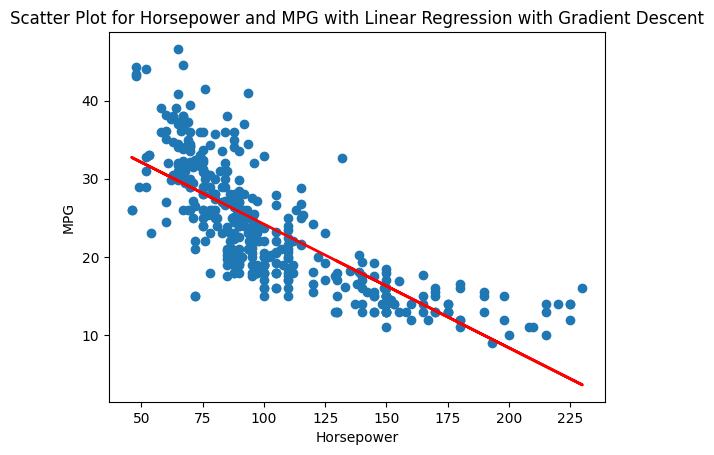

In [29]:
plot.scatter(DataFrame['horsepower'], DataFrame['mpg'])
plot.plot(DataFrame['horsepower'], X_Matrix_GradientDescent @ W_Parameters_GradientDescent, color='red', linewidth=2)
plot.title('Scatter Plot for Horsepower and MPG with Linear Regression with Gradient Descent')
plot.xlabel('Horsepower')
plot.ylabel('MPG')
plot.show()

As shown in the figure, it matches as in point 8 (simple linear regression)